In [396]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report


Dataframe = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00244/fertility_Diagnosis.txt', names=['Season in which the analysis was performed', 'Age at the time of analysis', 'Childish diseases', 'Accident or serious trauma', 'Surgical intervention', 'High fevers in the last year', 'Frequency of alcohol consumption', 'Smoking habit', 'Number of hours spent sitting per day ene-16', 'Output'])
Dataframe.head(20)

,Season in which the analysis was performed,Age at the time of analysis,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day ene-16,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
5,-0.33,0.67,1,0,1,0,0.8,0,0.50,N
6,-0.33,0.67,0,0,0,-1,0.8,-1,0.44,N
7,-0.33,1.00,1,1,1,0,0.6,-1,0.38,N
8,1.00,0.64,0,0,1,0,0.8,-1,0.25,N
9,1.00,0.61,1,0,0,0,1.0,-1,0.25,N


In [397]:
Dataframe.info()
print(Dataframe.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Season in which the analysis was performed    100 non-null    float64
 1   Age at the time of analysis                   100 non-null    float64
 2   Childish diseases                             100 non-null    int64  
 3   Accident or serious trauma                    100 non-null    int64  
 4   Surgical intervention                         100 non-null    int64  
 5   High fevers in the last year                  100 non-null    int64  
 6   Frequency of alcohol consumption              100 non-null    float64
 7   Smoking habit                                 100 non-null    int64  
 8   Number of hours spent sitting per day ene-16  100 non-null    float64
 9   Output                                        100 non-null    obje

In [398]:
Dataframe['Output'] = Dataframe['Output'].replace(['N', 'O'], [0, 1])

In [399]:
Dataframe.head(5)

,Season in which the analysis was performed,Age at the time of analysis,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day ene-16,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1


In [400]:
fert_df = Dataframe.apply(pd.to_numeric)

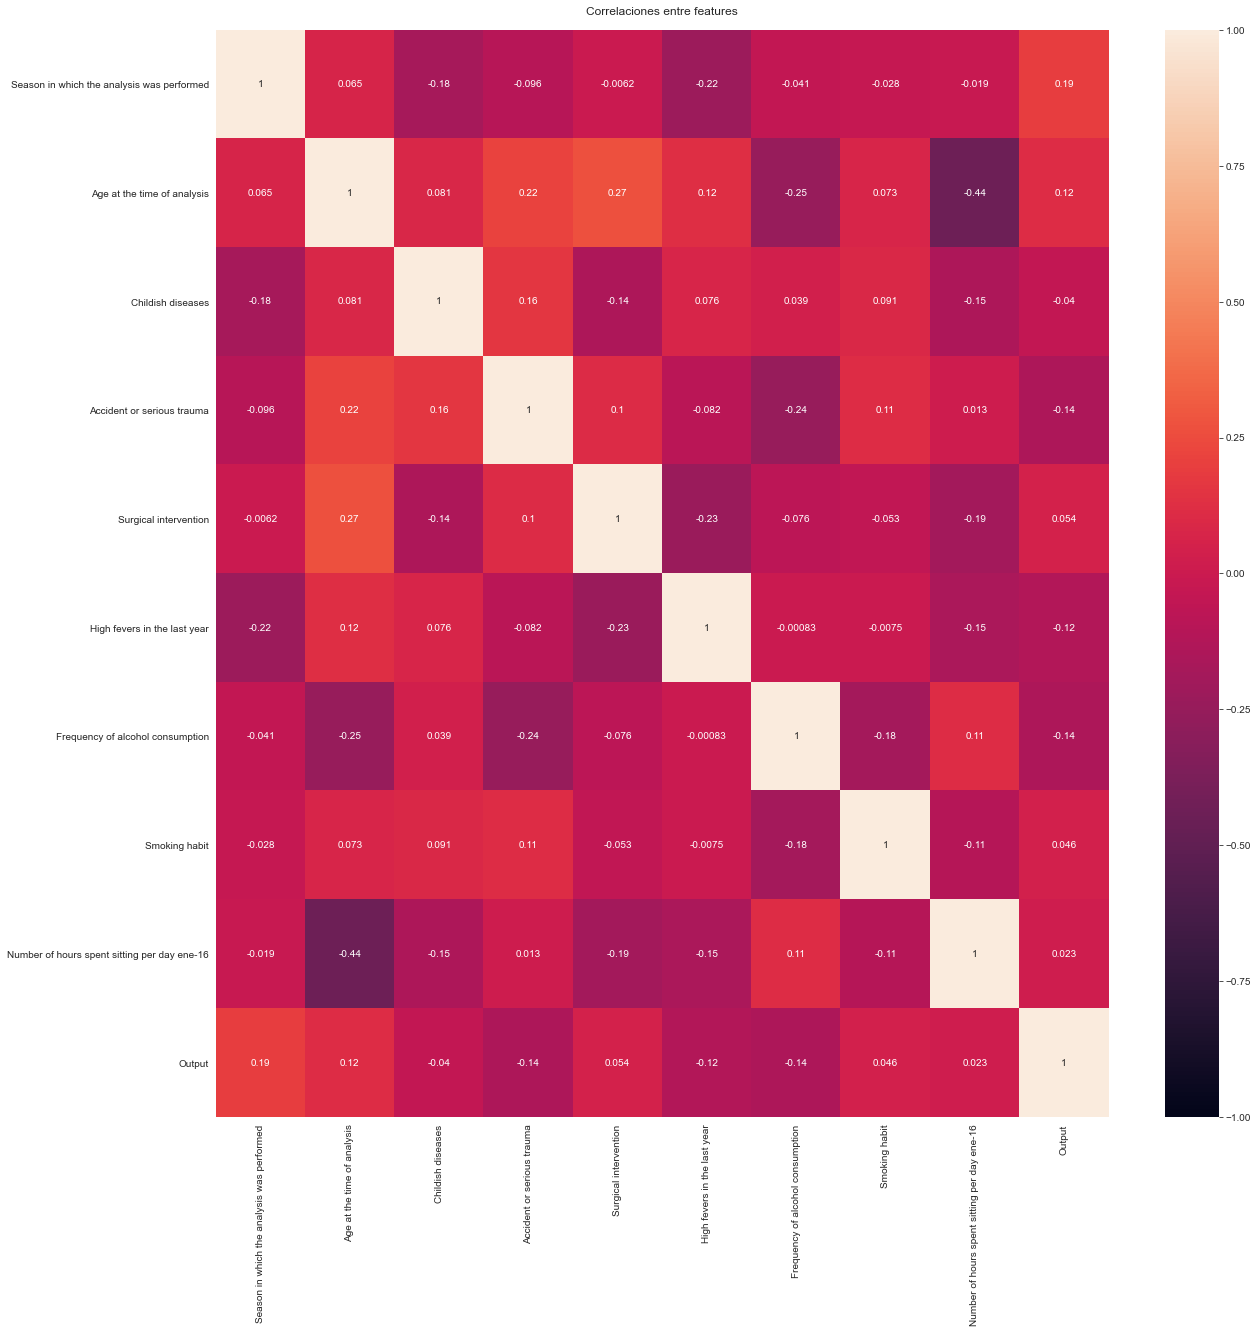

In [49]:
plt.figure(figsize=(20,20))
pltcorr = sns.heatmap(fert_df.corr(), vmin=-1, vmax=1, annot=True)
pltcorr.set_title('Correlaciones entre features', fontdict={'fontsize':12}, pad=15);

<AxesSubplot:>

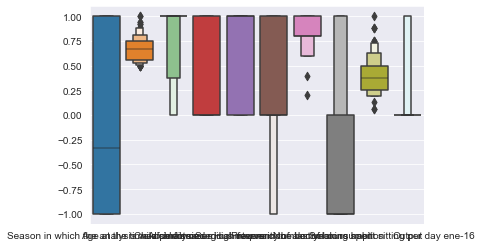

In [44]:
sns.boxenplot(data=fert_df)

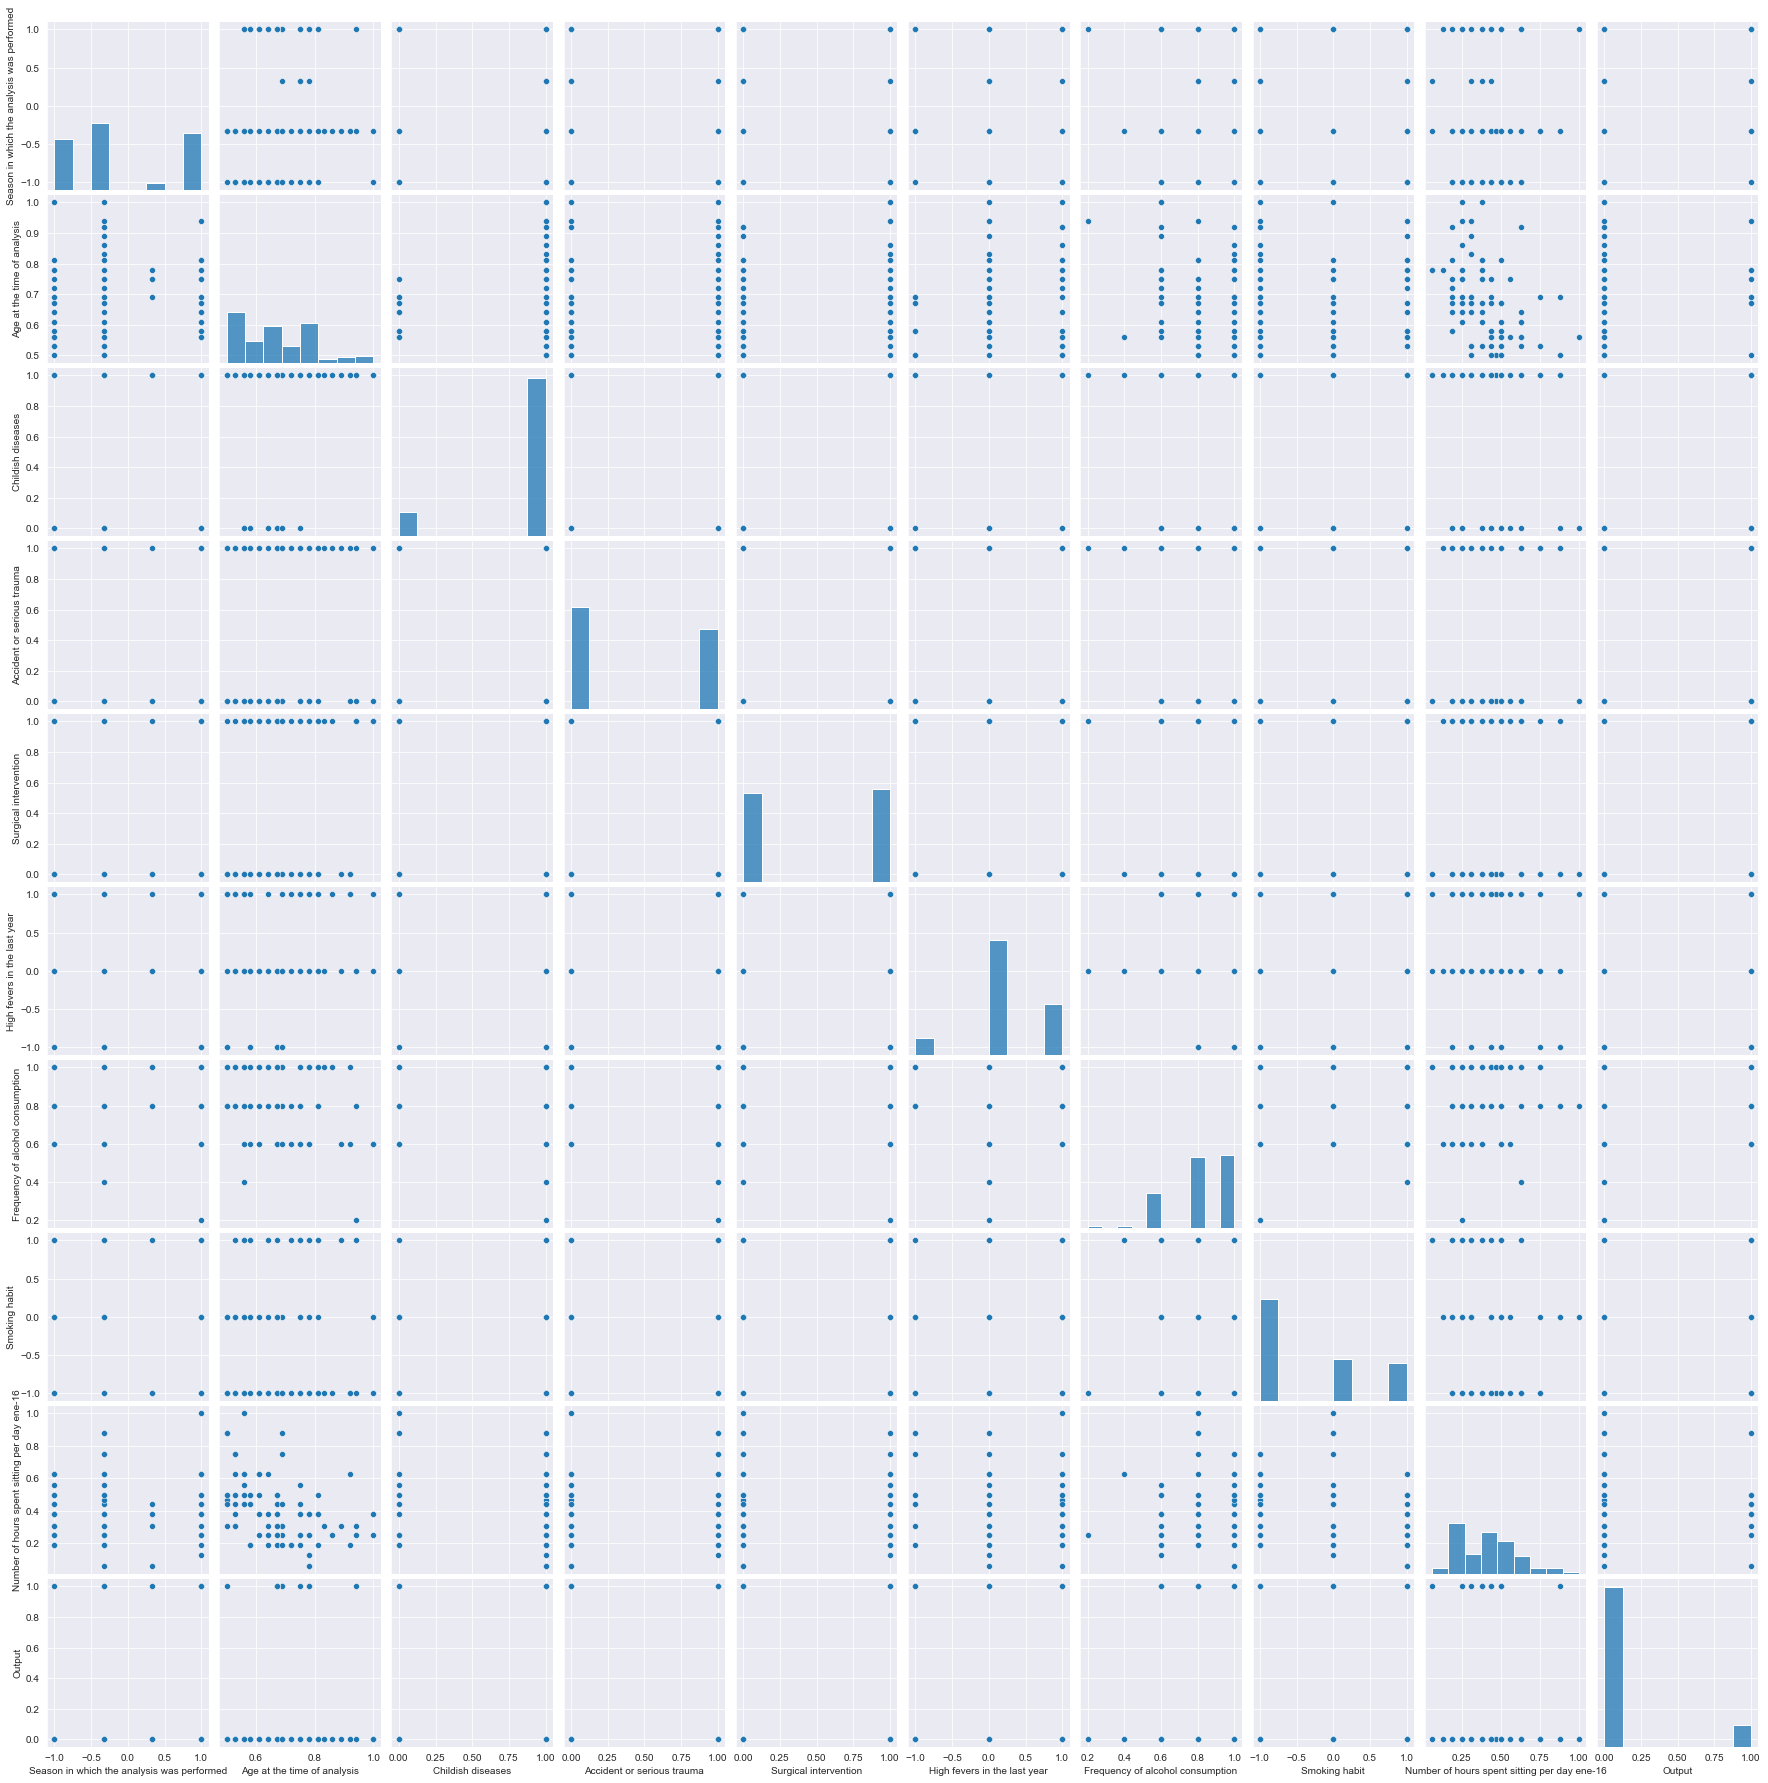

In [45]:
sns.pairplot(fert_df)

In [401]:
X = fert_df.iloc[:, :-1]
y = fert_df.iloc[:, -1]
print(X, 'Caracteristicas')
print(y, 'Label')

    Season in which the analysis was performed  Age at the time of analysis  \
0                                        -0.33                         0.69   
1                                        -0.33                         0.94   
2                                        -0.33                         0.50   
3                                        -0.33                         0.75   
4                                        -0.33                         0.67   
..                                         ...                          ...   
95                                       -1.00                         0.67   
96                                       -1.00                         0.61   
97                                       -1.00                         0.67   
98                                       -1.00                         0.64   
99                                       -1.00                         0.69   

    Childish diseases  Accident or serious trauma  

In [402]:
transformer = MinMaxScaler()
transformer.fit_transform(X)

array([[0.335     , 0.38      , 0.        , 1.        , 1.        ,
        0.5       , 0.75      , 0.5       , 0.87234043],
       [0.335     , 0.88      , 1.        , 0.        , 1.        ,
        0.5       , 0.75      , 1.        , 0.26595745],
       [0.335     , 0.        , 1.        , 0.        , 0.        ,
        0.5       , 1.        , 0.        , 0.46808511],
       [0.335     , 0.5       , 0.        , 1.        , 1.        ,
        0.5       , 1.        , 0.        , 0.34042553],
       [0.335     , 0.34      , 1.        , 1.        , 0.        ,
        0.5       , 0.75      , 0.        , 0.46808511],
       [0.335     , 0.34      , 1.        , 0.        , 1.        ,
        0.5       , 0.75      , 0.5       , 0.46808511],
       [0.335     , 0.34      , 0.        , 0.        , 0.        ,
        0.        , 0.75      , 0.        , 0.40425532],
       [0.335     , 1.        , 1.        , 1.        , 1.        ,
        0.5       , 0.5       , 0.        , 0.34042553],


In [563]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)
print('Tamaño x: ' + str(len(X)))
print('Tamaño y: ' + str(len(y)))
print('Tamaño X_train: ' + str(len(X_train)))
print('Tamaño y_train: ' + str(len(y_train)))
print('Tamaño x_test: ' + str(len(X_test)))
print('Tamaño y_test: ' + str(len(y_test)))

Tamaño x: 100
Tamaño y: 100
Tamaño X_train: 75
Tamaño y_train: 75
Tamaño x_test: 25
Tamaño y_test: 25


In [564]:
penalty = ['l2', 'l1', 'elasticnet', None]
alpha=[1e-100000, 1e-1000, 1e-100, 1e-50, 1e-10, 1e-5, 1e4, 1e3, 1e2, 1e1, 1e0]
tol=[1e-3,1e-2,1e-1,1e3,1e4,1e5]


In [571]:
accuracy_values=[]
recall_values=[]

for a in tol:
    for b in alpha:
        for c in penalty:
                percept = Perceptron(tol=a, max_iter=50,penalty=c,alpha=b, eta0=0.1)
                percept.fit(X_train, y_train)
                y_prediction = percept.predict(X_test)
                new_recall=recall_score(y_test, y_prediction)
                new_accuracy=accuracy_score(y_test, y_prediction)
                accuracy_values.append(new_accuracy)
                recall_values.append(new_recall)

In [574]:
print(accuracy_values)
print(np.max(accuracy_values))

[0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.8, 0.8, 0.8, 0.76, 0.8, 0.8, 0.8, 0.76, 0.8, 0.8, 0.8, 0.76, 0.8, 0.8, 0.8, 0.76, 0.8, 0.8, 0.8, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.8, 0.8, 0.8, 0.76, 0.8, 0.8, 0.8, 0.76, 0.8, 0.8, 0.8, 0.76, 0.8, 0.8, 0.8, 0.76, 0.8, 0.8, 0.8, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.8, 0.8, 0.8, 0.76, 0.8, 0.8, 0.8, 0.76, 0.8, 0.8, 0.8, 0.76, 0.8, 0.8, 0.8, 0.76, 0.8, 0.8, 0.8, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.8, 0.8, 0.8, 0.76, 0.8, 0.8, 0.8, 0.76, 0.8, 0.8, 0.8, 0.76, 0.8, 0.8, 0.8, 0.76, 0.8, 0.8, 0.8, 0.76, 0.7

tn: 19
fp: 1
fn: 5
tp: 0


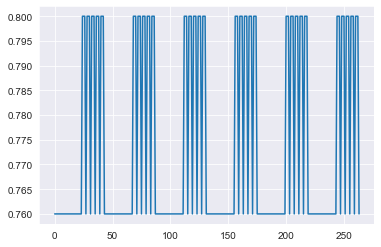

In [575]:
y_pred = percept.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('tn: ' + str(tn))
print('fp: ' + str(fp))
print('fn: ' + str(fn))
print('tp: ' + str(tp))
plt.plot(accuracy_values)


Luego de realizar un análisis exhaustivo y amplio sobre la relación de los datos en este dataset, entender cómo se comportan las relaciones entre los hábitos saludables, historial de enfermedades, actividad física y entre otras con respecto a la fertilidad de un individuo, como lo muestra la gráfica sns.heatmap(fert_df.corr()), siendo las de mayor relación peso-categoría el accidente o trauma serio, intervenciones quirúrgicas y la edad. Lo anterior tiene sentido pues con la edad se da el propio envejecimiento del cuerpo, con lo cual también se van oxidando y perdiendo capacidades que en la juventud estaban presentes.

Posterior a esta exploración de datos y revisión de correlaciones se entrena y evalúa el modelo, de manera que con los datos de entrada, aquellas columnas que no son el diagnóstico, y los datos objetivos, aquellos que cuentan con el diagnóstico.

Se consigue una predicción del 80% sobre los datos de prueba, teniendo en cuenta que el algoritmo se entrenó con el 25% del tamaño del dataset (100 datos), la mayor cantidad de datos fueron 'True Negative', lo que indica que el valor real y el predicho concuerdan para una persona no es infertil, según el estudio, no se detectó nadie infertil durante el estudio, solo 1 falso positivo y 5 falsos negativos, con lo que se puede considerar al modelo efectivo para clasificar personas infertiles de no infertiles.

